## DB check
prices.dbが正しく調整されているか確認

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
import pickle
from urllib.request import urlretrieve

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import seaborn as sns
import sqlalchemy
from sqlalchemy import MetaData,Table,select

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))
import src.data_collect.get_divide_union as db

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.CRITICAL)

In [6]:
# graph setting
sns.set()

In [11]:
# global setting
table_name:str='prices'
db_name:str='../data/mstock.db'
from_date:str='2010-01-01'
end_date:str='2021-01-01'

# engine作成

In [8]:
engine=db.create_engine(db_name)

In [9]:
with engine.connect() as conn:
    print(conn.close())

None


# DBからload

In [10]:
meta=MetaData()
table=Table(table_name,meta,autoload=True,autoload_with=engine)

2021-04-02 18:31:17,502 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("prices")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("prices")


2021-04-02 18:31:17,504 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2021-04-02 18:31:17,510 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2021-04-02 18:31:17,514 INFO sqlalchemy.engine.Engine [raw sql] ('prices',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('prices',)


2021-04-02 18:31:17,523 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("prices")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("prices")


2021-04-02 18:31:17,528 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2021-04-02 18:31:17,532 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("prices")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("prices")


2021-04-02 18:31:17,538 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2021-04-02 18:31:17,543 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2021-04-02 18:31:17,544 INFO sqlalchemy.engine.Engine [raw sql] ('prices',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('prices',)


2021-04-02 18:31:17,550 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("prices")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("prices")


2021-04-02 18:31:17,551 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2021-04-02 18:31:17,552 INFO sqlalchemy.engine.Engine PRAGMA temp.index_list("prices")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.index_list("prices")


2021-04-02 18:31:17,553 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2021-04-02 18:31:17,554 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("prices")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("prices")


2021-04-02 18:31:17,555 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2021-04-02 18:31:17,557 INFO sqlalchemy.engine.Engine PRAGMA temp.index_list("prices")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.index_list("prices")


2021-04-02 18:31:17,558 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2021-04-02 18:31:17,559 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2021-04-02 18:31:17,560 INFO sqlalchemy.engine.Engine [raw sql] ('prices',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('prices',)


In [12]:
def read_stock_close(code:int,table:sqlalchemy.Table,conn,graph_num:int,from_date:str=from_date,end_date:str=end_date)->pd.Series:
    """指定した銘柄、日付以降の終値を取得"""
    stmt=table.select(table.c.code==code).where(table.c.date>from_date).where(table.c.date<end_date)
    df=pd.read_sql(stmt,conn)
    df.set_index('date',inplace=True)

    return df['close']

In [13]:
with open('../data/codelist_core26.pkl','rb') as f:
    codelist26=pickle.load(f)

2021-04-02 18:32:37,542 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,544 INFO sqlalchemy.engine.Engine [generated in 0.00157s] (2914, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[generated in 0.00157s] (2914, '2010-01-01', '2021-01-01')


2021-04-02 18:32:37,667 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,669 INFO sqlalchemy.engine.Engine [cached since 0.1265s ago] (3382, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.1265s ago] (3382, '2010-01-01', '2021-01-01')


2021-04-02 18:32:37,721 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,723 INFO sqlalchemy.engine.Engine [cached since 0.1808s ago] (4063, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.1808s ago] (4063, '2010-01-01', '2021-01-01')


2021-04-02 18:32:37,774 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,775 INFO sqlalchemy.engine.Engine [cached since 0.2333s ago] (4452, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.2333s ago] (4452, '2010-01-01', '2021-01-01')


2021-04-02 18:32:37,826 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,827 INFO sqlalchemy.engine.Engine [cached since 0.2851s ago] (4502, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.2851s ago] (4502, '2010-01-01', '2021-01-01')


2021-04-02 18:32:37,877 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,879 INFO sqlalchemy.engine.Engine [cached since 0.3374s ago] (4503, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.3374s ago] (4503, '2010-01-01', '2021-01-01')


2021-04-02 18:32:37,930 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,932 INFO sqlalchemy.engine.Engine [cached since 0.3896s ago] (4568, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.3896s ago] (4568, '2010-01-01', '2021-01-01')


2021-04-02 18:32:37,985 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:37,987 INFO sqlalchemy.engine.Engine [cached since 0.4449s ago] (6098, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.4449s ago] (6098, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,034 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,038 INFO sqlalchemy.engine.Engine [cached since 0.4958s ago] (6501, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.4958s ago] (6501, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,093 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,098 INFO sqlalchemy.engine.Engine [cached since 0.5559s ago] (6758, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.5559s ago] (6758, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,160 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,164 INFO sqlalchemy.engine.Engine [cached since 0.6222s ago] (6861, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.6222s ago] (6861, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,220 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,225 INFO sqlalchemy.engine.Engine [cached since 0.6832s ago] (6954, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.6832s ago] (6954, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,280 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,286 INFO sqlalchemy.engine.Engine [cached since 0.7443s ago] (6981, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.7443s ago] (6981, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,342 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,348 INFO sqlalchemy.engine.Engine [cached since 0.8056s ago] (7203, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.8056s ago] (7203, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,404 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,409 INFO sqlalchemy.engine.Engine [cached since 0.8673s ago] (7267, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.8673s ago] (7267, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,468 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,474 INFO sqlalchemy.engine.Engine [cached since 0.9319s ago] (7751, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.9319s ago] (7751, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,530 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,535 INFO sqlalchemy.engine.Engine [cached since 0.9931s ago] (7974, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 0.9931s ago] (7974, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,589 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,595 INFO sqlalchemy.engine.Engine [cached since 1.053s ago] (8031, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.053s ago] (8031, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,654 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,660 INFO sqlalchemy.engine.Engine [cached since 1.118s ago] (8058, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.118s ago] (8058, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,719 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,725 INFO sqlalchemy.engine.Engine [cached since 1.183s ago] (8306, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.183s ago] (8306, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,786 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,792 INFO sqlalchemy.engine.Engine [cached since 1.249s ago] (8316, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.249s ago] (8316, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,854 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,859 INFO sqlalchemy.engine.Engine [cached since 1.317s ago] (8411, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.317s ago] (8411, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,918 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,924 INFO sqlalchemy.engine.Engine [cached since 1.382s ago] (8766, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.382s ago] (8766, '2010-01-01', '2021-01-01')


2021-04-02 18:32:38,982 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:38,987 INFO sqlalchemy.engine.Engine [cached since 1.445s ago] (8802, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.445s ago] (8802, '2010-01-01', '2021-01-01')


2021-04-02 18:32:39,041 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:39,046 INFO sqlalchemy.engine.Engine [cached since 1.504s ago] (9020, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.504s ago] (9020, '2010-01-01', '2021-01-01')


2021-04-02 18:32:39,102 INFO sqlalchemy.engine.Engine SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


INFO:sqlalchemy.engine.Engine:SELECT prices.code, prices.date, prices.open, prices.high, prices.low, prices.close, prices.volume, prices.adjust 
FROM prices 
WHERE prices.code = ? AND prices.date > ? AND prices.date < ?


2021-04-02 18:32:39,107 INFO sqlalchemy.engine.Engine [cached since 1.565s ago] (9022, '2010-01-01', '2021-01-01')


INFO:sqlalchemy.engine.Engine:[cached since 1.565s ago] (9022, '2010-01-01', '2021-01-01')


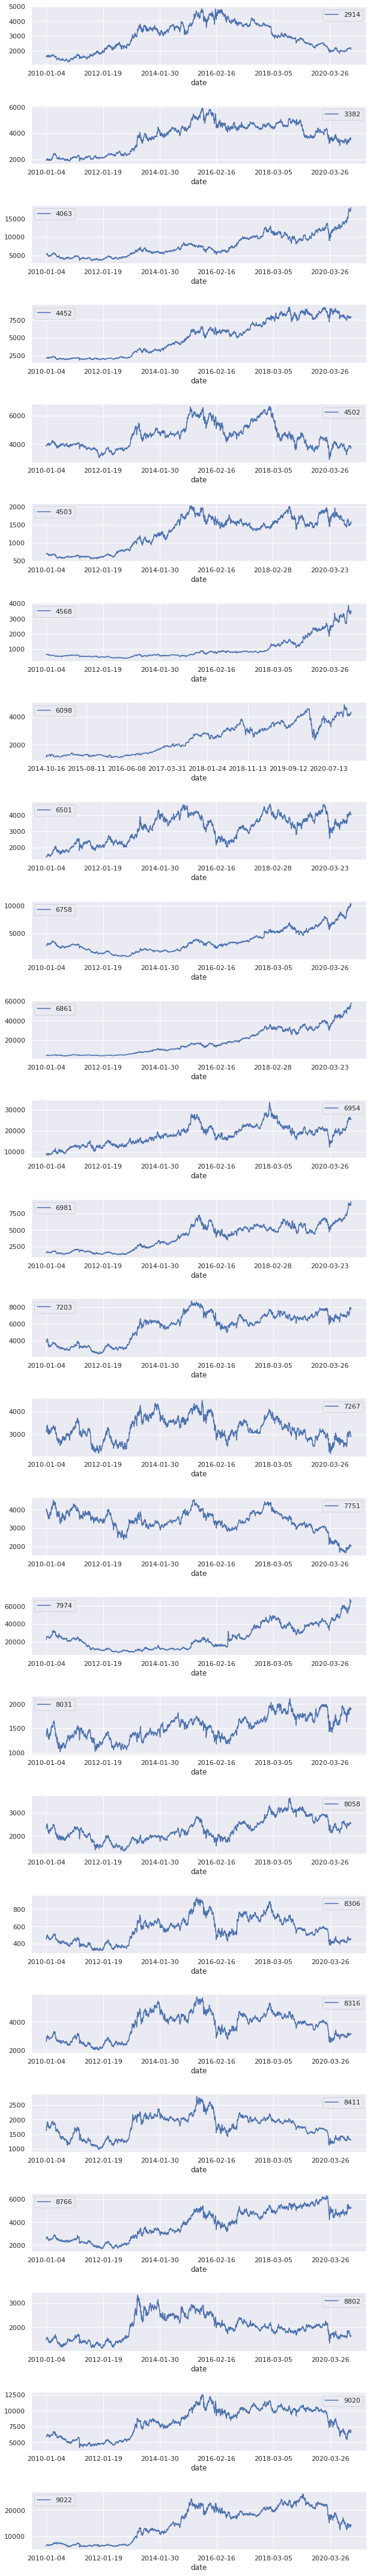

In [14]:
graph_num=len(codelist26)
fig, axes= plt.subplots(graph_num,figsize=(10,3*graph_num))
plt.subplots_adjust(wspace=0.4, hspace=0.7)
for idx,code in enumerate(codelist26[:graph_num]):
    with engine.connect() as conn:
        df=read_stock_close(code=code,table=table,conn=conn,graph_num=graph_num)
        df.plot(ax=axes[idx],label='%s'%(code))
        axes[idx].legend()